In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房屋价值数据集
import pandas as pd

In [2]:
housevalue = fch()

In [3]:
X = pd.DataFrame(housevalue.data)
X

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [4]:
y = housevalue.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [5]:
X.shape

(20640, 8)

In [6]:
X.columns = housevalue.feature_names

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=420)

In [8]:
reg = LR().fit(X_train, y_train)
reg.score(X_test, y_test)

0.6043668160178817

In [9]:
reg.predict(X_test)

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [10]:
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [11]:
reg.intercept_

-36.256893229203875

In [12]:
from sklearn.metrics import mean_squared_error as MSE

In [13]:
y_pred = reg.predict(X_test)

In [14]:
MSE(y_test, y_pred)

0.5309012639324571

In [15]:
cross_val_score(reg, X, y, cv=10, scoring='mean_squared_error')

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [16]:
import sklearn

In [17]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [18]:
cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y_test, y_pred)

0.6043668160178817

In [21]:
import matplotlib.pyplot as plt
import numpy as np

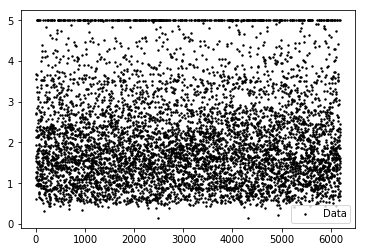

In [22]:
plt.scatter(range(len(y_test)), y_test, c='k', label='Data', s=2)
plt.legend()
plt.show()

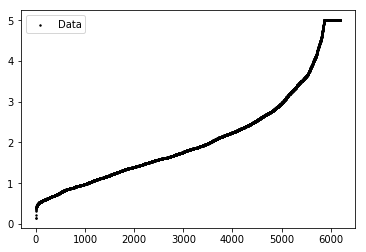

In [23]:
plt.scatter(range(len(y_test)), sorted(y_test), c='k', label='Data', s=2)
plt.legend()
plt.show()

In [24]:
ind = np.argsort(y_test)
ind

array([2477, 4318, 4930, ..., 2806, 2786, 3736])

In [25]:
y_pred = pd.DataFrame(y_pred, index=ind)
y_pred

,0
2477,1.513849
4318,0.465662
4930,2.256773
173,2.313086
948,2.458239
679,2.459214
4660,0.779784
2291,2.309519
4973,2.056962
2708,1.367783


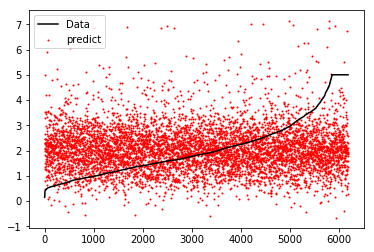

In [26]:
plt.plot(range(len(y_test)), sorted(y_test), c='k', label='Data')
plt.scatter(range(len(y_pred)), y_pred, c='r', label='predict', s=1)
plt.legend()
plt.show()

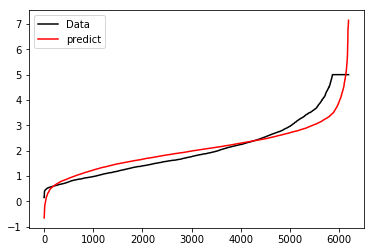

In [27]:
plt.plot(range(len(y_test)), sorted(y_test), c='k', label='Data')
plt.plot(range(len(y_pred)), sorted(y_pred.iloc[:, 0]), c='r', label='predict')
plt.legend()
plt.show()

In [28]:
import numpy as np
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2')

array([-180.05938657,   -5.73952833,  -15.44888656,  -77.5164772 ,
        -64.18908062])

In [29]:
# 岭回归和Lasso
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [30]:
X_train, X_test, y_train, y_test = TTS(X, y, test_size=.3, random_state=420)

In [31]:
reg = Ridge(alpha=1).fit(X_train, y_train)
reg.score(X_test, y_test)

0.6043610352312281

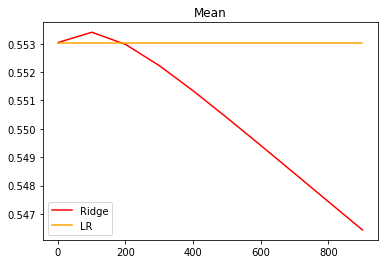

In [32]:
#交叉验证下，与线性回归相比，岭回归的结果如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

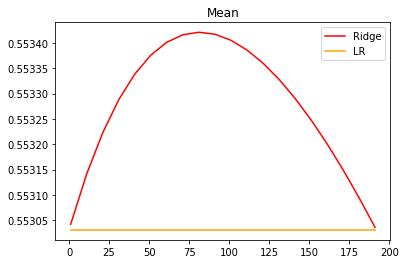

In [33]:
#细化一下学习曲线
alpharange = np.arange(1,201,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

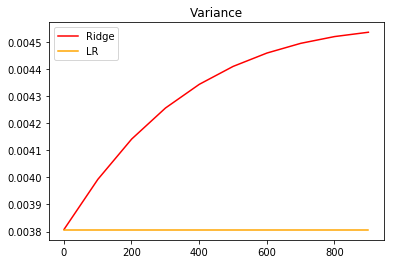

In [34]:
#模型方差如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

In [35]:
from sklearn.datasets import load_boston

In [36]:
X = load_boston().data
y = load_boston().target

In [47]:
X_train,X_test,y_train,y_test = TTS(X,y,test_size=0.3,random_state=420)

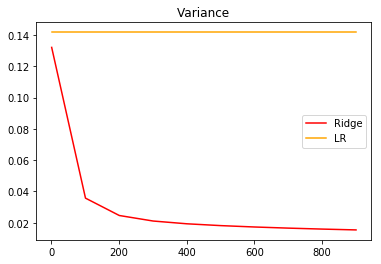

In [38]:
#先查看方差的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

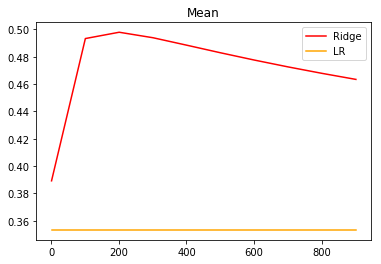

In [39]:
#查看R2的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

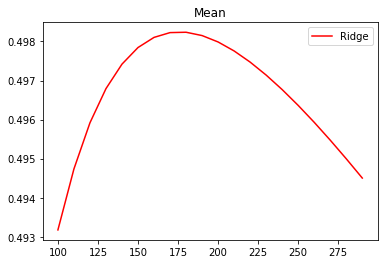

In [40]:
#细化学习曲线
alpharange = np.arange(100,300,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    #linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    #linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
#plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

In [41]:
from sklearn.linear_model import RidgeCV

In [43]:
ridg = RidgeCV(alphas=np.arange(1, 1001, 100), 
               scoring='r2', 
               store_cv_values=True).fit(X_train, y_train)

In [44]:
ridg.score(X_test, y_test)

0.7504796920543482

In [45]:
ridg.cv_values_

array([[-1.88034392, -0.13759822,  0.36417849, ...,  1.3741815 ,
         1.48196436,  1.57552318],
       [ 5.93061036,  5.65402683,  5.57108086, ...,  5.5298725 ,
         5.5343662 ,  5.53898217],
       [-3.57896188, -4.16066613, -4.25011902, ..., -4.38034088,
        -4.3939264 , -4.40635957],
       ...,
       [-5.07855143, -3.87144229, -3.63060932, ..., -3.44401456,
        -3.44592637, -3.45105697],
       [ 1.70531038,  1.77735561,  1.88293615, ...,  2.0990883 ,
         2.12416378,  2.14654282],
       [-5.80247371, -5.26919387, -5.25388409, ..., -5.347734  ,
        -5.37468462, -5.40242396]])

In [46]:
ridg.alpha_

1

In [48]:
housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [49]:
X_train,X_test,y_train,y_test = TTS(X,y,test_size=0.3,random_state=420)

In [50]:
reg = LinearRegression().fit(X_train, y_train)

In [51]:
list(reg.coef_*100)

[43.73589305968403,
 1.0211268294493994,
 -10.780721617317697,
 62.64338275363783,
 5.216125353261353e-05,
 -0.3348509646333585,
 -41.3095937894772,
 -42.6210953620847]

In [57]:
ridge = Ridge(alpha=100).fit(X_train, y_train)
list(ridge.coef_*100)

[42.6340016456014,
 1.0439364832937972,
 -8.64872986456114,
 51.48770904687755,
 0.000141363515614001,
 -0.3326091770785092,
 -40.952268398537655,
 -42.096046805893586]

In [58]:
lass = Lasso(alpha=1).fit(X_train, y_train)
list(lass.coef_*100)

[14.581141247629409,
 0.6209347344423876,
 0.0,
 -0.0,
 -0.0002806598632900996,
 -0.0,
 -0.0,
 -0.0]

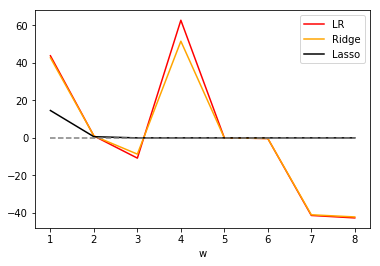

In [60]:
#将系数进行绘图
plt.plot(range(1,9),(reg.coef_*100).tolist(),color="red",label="LR")
plt.plot(range(1,9),(ridge.coef_*100).tolist(),color="orange",label="Ridge")
plt.plot(range(1,9),(lass.coef_*100).tolist(),color="k",label="Lasso")
plt.plot(range(1,9),[0]*8,color="grey",linestyle="--")
plt.xlabel('w') #横坐标是每一个特征所对应的系数
plt.legend()
plt.show()